In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os, json

%matplotlib inline


In [5]:
import pyusct
from pyusct.preprocess import preprocess

In [6]:
result_path = "/mnt/nas/2017-11-23_2/"
param_path = os.path.join(result_path, 'param.json')

In [7]:
with open(param_path, 'r') as f: param = json.load(f)
print(json.dumps(param, indent=4))

{
    "grid": {
        "Nx": 1024,
        "Ny": 1024,
        "dx": 0.000125,
        "dy": 0.000125
    },
    "io": {
        "save_movie": true
    },
    "ringarray": {
        "radius": 0.05,
        "num_points": 256
    },
    "t_end": 0.0001,
    "sensor": {
        "freq": 40000000.0
    },
    "source": {
        "waveform": {
            "wavenum": 1,
            "wavenum_offset": 2,
            "freq": 2000000.0,
            "magnitude": 50,
            "type": "sinusoidal"
        },
        "point_map": [
            1,
            17,
            33,
            49,
            65,
            81,
            97,
            113,
            129,
            145,
            161,
            177,
            193,
            209,
            225,
            241
        ]
    }
}


## set up sampling point (random)

In [26]:
ix = np.random.randint(300, 700)
iy = np.random.randint(400, 600)
(ix, iy)

(582, 507)

In [27]:
x = ix * param["grid"]["dx"]
y = iy * param["grid"]["dy"]
(x, y)

(0.07275, 0.063375)

In [28]:
map_speed, map_dens, mat_pre = preprocess(result_path, [[x,y]], offset = 1)

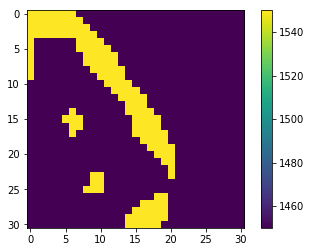

In [32]:
r = 15
plt.imshow(map_speed[iy-r:iy+r+1, ix-r:ix+r+1])
plt.colorbar()

In [33]:
#plt.imshow(map_dens[iy-r:iy+r+1, ix-r:ix+r+1])

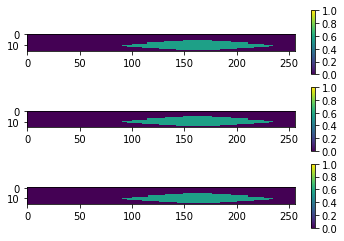

In [34]:
for j in range(mat_pre.shape[3]):
    plt.subplot(mat_pre.shape[3], 1, j+1)
    plt.imshow( mat_pre[0,:,:,j], vmin = 0., vmax = 1.0)
    plt.colorbar()

## True medium distributions

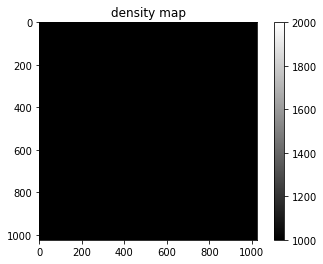

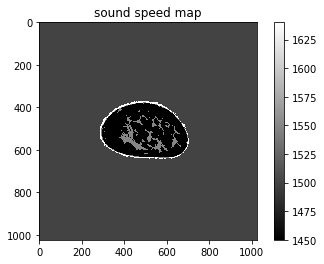

In [11]:
plt.imshow(map_dens, cmap='gray')
plt.plot()
plt.colorbar()
plt.title("density map")
plt.show()
plt.imshow(map_speed, cmap='gray')
plt.colorbar()
plt.title("sound speed map")
plt.show()